In [1]:
%reload_ext nb_black

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn import datasets, metrics

<IPython.core.display.Javascript object>

In [2]:
postgres_user = "dsbc_student"
postgres_pw = "7*.8G9QH21"
postgres_host = "142.93.121.174"
postgres_port = "5432"
postgres_db = "heartdisease"

engine = create_engine(
    "postgresql://{}:{}@{}:{}/{}".format(
        postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db
    )
)

heart_df = pd.read_sql_query("select * from heartdisease", con=engine)

engine.dispose()

<IPython.core.display.Javascript object>

In [3]:
heart_df = heart_df.drop(index=0, axis=0)
# Define the features and the outcome
X = heart_df.iloc[:, :13]
y = heart_df.iloc[:, 13]

# Replace missing values (marked by `?`) with a `0`
X = X.replace(to_replace="?", value=0)

# Binarize `y` so that `1` means heart disease diagnosis and `0` means no diagnosis
y = np.where(y > 0, 0, 1)

<IPython.core.display.Javascript object>

In [4]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

<IPython.core.display.Javascript object>

### Dendrograms
1. Complete Linkage

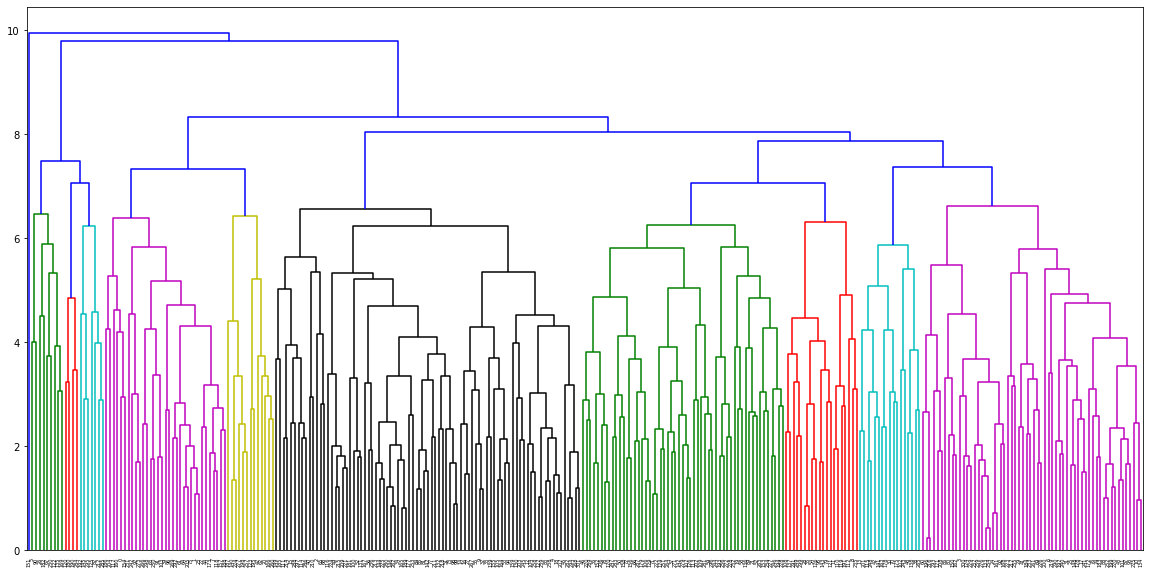

<IPython.core.display.Javascript object>

In [5]:
# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(
    linkage="complete", affinity="euclidean", n_clusters=2
)

# Fit model
clusters1 = agg_cluster.fit_predict(X_std)

# plot dendrogram
plt.figure(figsize=(20, 10))
dendrogram(linkage(X_std, method="complete"))
plt.show()

2. Average Linkage 

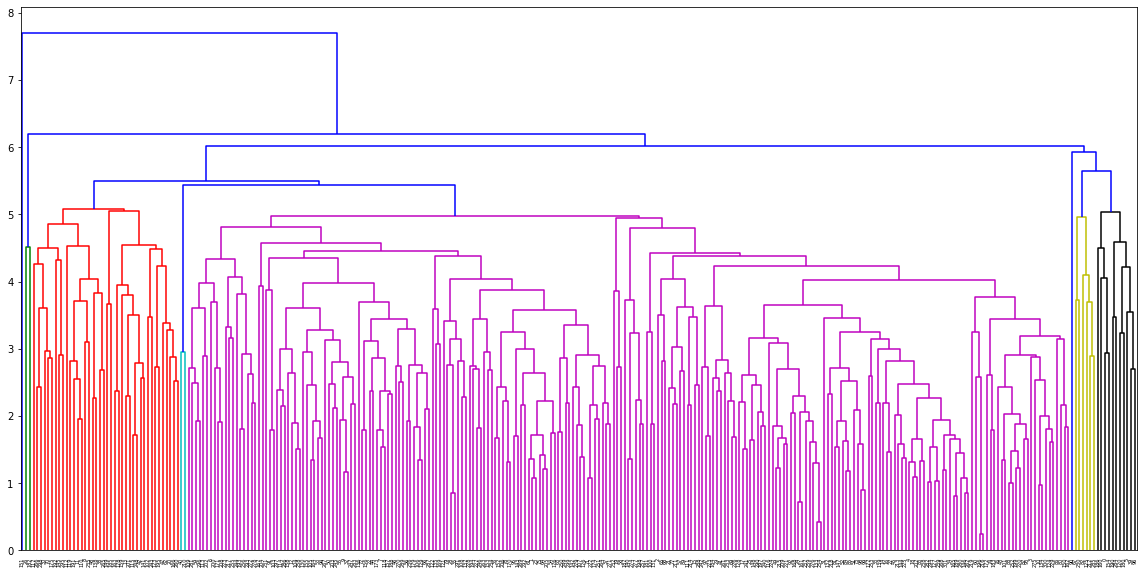

<IPython.core.display.Javascript object>

In [6]:
# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(
    linkage="average", affinity="cosine", n_clusters=2
)

# Fit model
clusters2 = agg_cluster.fit_predict(X_std)

# plot dendrogram
plt.figure(figsize=(20, 10))
dendrogram(linkage(X_std, method="average"))
plt.show()

3. Ward Linkage

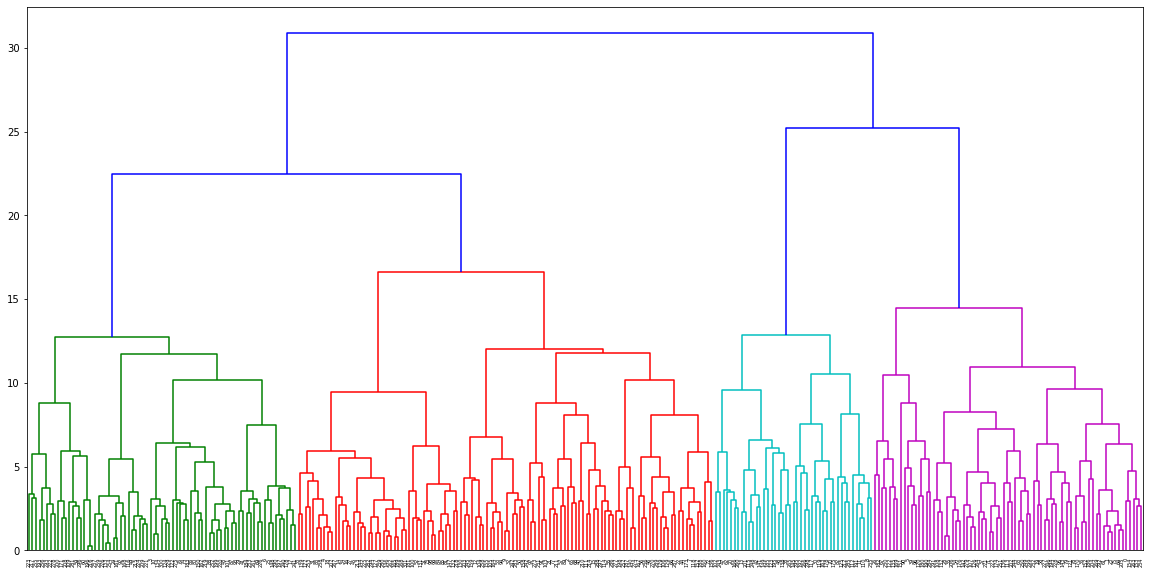

<IPython.core.display.Javascript object>

In [7]:
# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(
    linkage="ward", affinity="euclidean", n_clusters=2
)

# Fit model
clusters3 = agg_cluster.fit_predict(X_std)

# plot dendrogram
plt.figure(figsize=(20, 10))
dendrogram(linkage(X_std, method="ward"))
plt.show()

### Apply agglomerative clustering to the heart disease data by setting n_clusters=2. Try the three linkage methods above, and get ARI and silhouette scores for each of your solutions. Compare the results with each other. Then compare the results with the results from the k-means solution that you implemented in the previous checkpoint's assignment. Which algorithm and setting perform better?

In [8]:
for counter, data in enumerate(
    [("Complete", clusters1), ("Average", clusters2), ("Ward", clusters3)]
):
    print(
        "Adjusted Rand Index of the Agglomerative Clustering solution ({} Linkage): {}".format(
            data[0], metrics.adjusted_rand_score(y, data[1])
        )
    )
    print(
        "The silhoutte score of the Agglomerative Clustering solution ({} Linkage): {}".format(
            data[0], metrics.silhouette_score(X_std, data[1], metric="euclidean")
        )
    )

Adjusted Rand Index of the Agglomerative Clustering solution (Complete Linkage): -0.0009750554168186963
The silhoutte score of the Agglomerative Clustering solution (Complete Linkage): 0.3478419156783376
Adjusted Rand Index of the Agglomerative Clustering solution (Average Linkage): 0.22479672616966592
The silhoutte score of the Agglomerative Clustering solution (Average Linkage): 0.13741588431724602
Adjusted Rand Index of the Agglomerative Clustering solution (Ward Linkage): 0.15496125745564426
The silhoutte score of the Agglomerative Clustering solution (Ward Linkage): 0.14110248537784453


<IPython.core.display.Javascript object>

It appears that ward linkage has the best scores, but not as good as my K-means solution for 2 clusters, with ARI and silhouette of .45 and .18, respectively.